In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
pd.set_option('future.no_silent_downcasting', True)
import matplotlib.pyplot as plt
import seaborn as sns
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv("./data/data_selection_17_23.csv")

In [3]:
non_nan_data = raw_data.dropna()

In [7]:
non_nan_data

,timestamp,nodeid,temperature,humidity,voltage,light
65178,1505010,1,21.8112,34.64030,2.48502,478.40
65179,1505010,2,22.3306,35.23020,2.46440,537.28
65180,1505010,3,21.8896,35.02220,2.49546,412.16
65187,1505010,10,22.3600,34.32730,2.49546,625.60
65190,1505010,13,19.9296,39.00820,2.44412,1494.08
...,...,...,...,...,...,...
931613,1986360,6,122.1530,-3.91901,2.22442,0.92
931761,1986420,46,76.9362,45.37430,2.21612,1.38
931849,1986480,26,19.8904,53.12660,2.32910,0.46
931935,1986540,4,122.1530,38.63340,2.29313,5.06


In [8]:

def detect_anomalies_kde(data, column):
    original_index = data.index
    reshaped_data = data[column].values.reshape(-1, 1)

    # Perform Kernel Density Estimation
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(reshaped_data)
    log_density = kde.score_samples(reshaped_data)
    threshold = np.percentile(log_density, 1)  # Use 1% as the threshold
    anomaly_indices = original_index[log_density < threshold]

    return data.loc[anomaly_indices]

In [9]:
anomalous_temperature = detect_anomalies_kde(non_nan_data, 'temperature')
anomalous_humidity = detect_anomalies_kde(non_nan_data, 'humidity')
anomalous_voltage = detect_anomalies_kde(non_nan_data, 'voltage')
anomalous_light = detect_anomalies_kde(non_nan_data, 'light')

In [10]:
print(len(anomalous_temperature), "temperature anomalies")
print(len(anomalous_humidity), "humidity anomalies")
print(len(anomalous_voltage), "voltage anomalies")
print(len(anomalous_light), "light anomalies")

1844 temperature anomalies
1838 humidity anomalies
1622 voltage anomalies
1812 light anomalies


In [4]:
# save the results
anomalous_temperature.to_csv("./data/anomalous_temperature.csv", index=False)
anomalous_humidity.to_csv("./data/anomalous_humidity.csv", index=False)
anomalous_voltage.to_csv("./data/anomalous_voltage.csv", index=False)
anomalous_light.to_csv("./data/anomalous_light.csv", index=False)


NameError: name 'anomalous_temperature' is not defined

In [4]:
# Check and print anomalies for each attribute separately
print("Anomalous sensors in temperature:")
print(set(anomalous_temperature['nodeid']))

print("Anomalous sensors in humidity:")
print(set(anomalous_humidity['nodeid']))

#print("Anomalous sensors in voltage:")
#print(set(anomalous_voltage['nodeid']))

print("Anomalous sensors in light:")
print(set(anomalous_light['nodeid']))


Anomalous sensors in temperature:
{32, 35, 4, 6, 38, 39, 43, 13, 46, 19, 21, 24, 26, 29}
Anomalous sensors in humidity:
{32, 34, 35, 36, 6, 39, 43, 13, 47, 16, 17, 19, 25, 26, 27, 29, 30}
Anomalous sensors in light:
{1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54}


In [13]:
# Find the nodeid intersection of anomalies across all measurements
anomalous_sensors = set(anomalous_temperature['nodeid']) & \
                    set(anomalous_humidity['nodeid']) & \
                    set(anomalous_light['nodeid']) #set(anomalous_voltage['nodeid']) & \

print("Sensors that are anomalous across all attributes:")
print(anomalous_sensors)

Sensors that are anomalous across all attributes:
{32, 35, 6, 39, 43, 13, 19, 26, 29}


In [14]:
anomalous_temperature

,timestamp,nodeid,temperature,humidity,voltage,light
114086,1532160,39,90.9208,137.5120,0.009101,9.206940e-11
435760,1710870,35,38.0400,44.8460,2.320000,1.729600e+02
435976,1710990,35,38.3830,44.9782,2.320000,1.729600e+02
436084,1711050,35,38.3634,44.9782,2.320000,1.729600e+02
436192,1711110,35,38.2556,44.9782,2.320000,1.729600e+02
...,...,...,...,...,...,...
917721,1978620,46,72.0754,44.3162,2.224420,1.380000e+00
920907,1980390,46,74.2510,44.3494,2.224420,1.380000e+00
922851,1981470,46,74.2314,44.5151,2.224420,1.380000e+00
926069,1983270,24,63.3338,52.3659,2.338270,9.200000e-01


In [15]:
anomalous_humidity

,timestamp,nodeid,temperature,humidity,voltage,light
69036,1507140,25,30.0922,22.17190,2.56000,1847.36
77136,1511640,25,29.5630,22.31870,2.56000,1847.36
79026,1512690,25,29.4160,22.39200,2.56000,1847.36
82150,1514430,17,122.1530,22.97800,2.29313,1140.80
82312,1514520,17,122.1530,20.69930,2.29313,1023.04
...,...,...,...,...,...,...
794860,1910370,35,122.1530,-2.70687,2.23278,0.92
795076,1910490,35,122.1530,-3.43355,2.22442,0.92
795130,1910520,35,122.1530,-3.27191,2.23278,0.92
795346,1910640,35,122.1530,-3.27191,2.23278,0.92


In [16]:
anomalous_light

,timestamp,nodeid,temperature,humidity,voltage,light
111840,1530930,7,22.2914,35.7148,2.48502,28.52
112056,1531050,7,22.3600,35.5764,2.48502,24.84
112415,1531230,42,24.4180,31.7016,2.49546,28.52
112469,1531260,42,24.4278,31.7368,2.49546,28.52
112492,1531290,11,21.9288,38.1213,2.43410,34.04
...,...,...,...,...,...,...
899623,1968570,38,122.1530,44.5151,2.27556,19.32
900001,1968780,38,122.1530,44.5813,2.28431,19.32
900055,1968810,38,122.1530,44.5482,2.28431,19.32
900217,1968900,38,122.1530,44.5813,2.28431,19.32


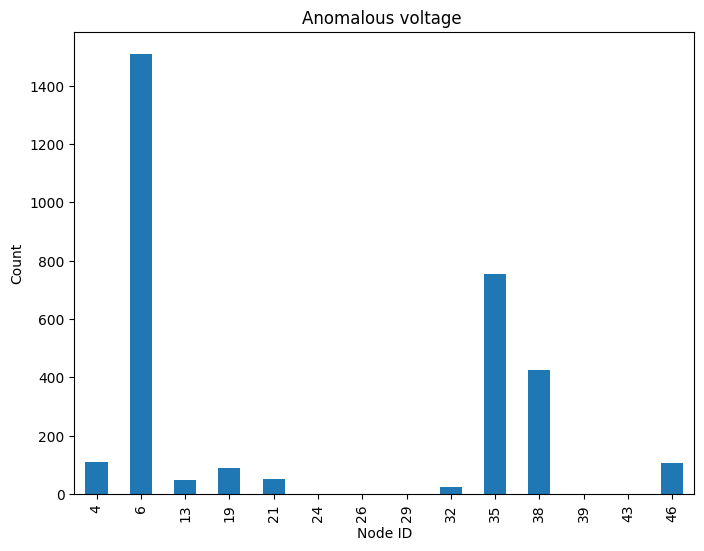

In [ ]:
# plot histograms of the anomalies_light on nodeid
plt.figure(figsize=(8, 6))
anomalous_voltage.groupby('nodeid').size().plot(kind='bar')
anomalous_temperature.groupby('nodeid').size().plot(kind='bar')

# label for all nodes
plt.xlabel("Node ID")
plt.ylabel("Count")
plt.title("Anomalous voltage ")
plt.show()

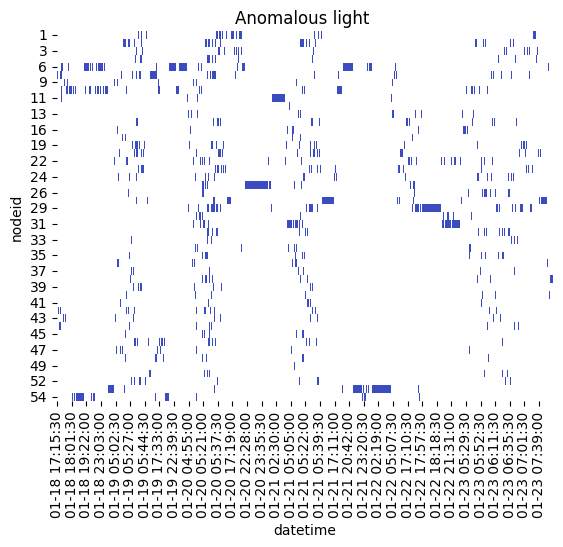

In [40]:
# anomaly detection for all sensors over time
anomalous_light['datetime'] = pd.to_datetime(anomalous_light['timestamp'], unit='s')
# format datetime to mm-dd hh:mm:ss
anomalous_light['datetime'] = anomalous_light['datetime'].dt.strftime('%m-%d %H:%M:%S')

sns.heatmap(anomalous_light.groupby(['nodeid', 'datetime']).size().unstack(), cmap='coolwarm', cbar=False)
# don't show side bar

# plt.xticks(rotation=45, ha= 'right')
plt.title("Anomalous light ")
plt.show()

## check the results!

In [5]:
# read the results
anomalous_temperature = pd.read_csv("./data/anomalous_temperature.csv")
anomalous_humidity = pd.read_csv("./data/anomalous_humidity.csv")
anomalous_voltage = pd.read_csv("./data/anomalous_voltage.csv")
anomalous_light = pd.read_csv("./data/anomalous_light.csv")

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# compare it with manual detection
# manual detection
labeled_df=pd.read_csv('./data/manual_label.csv')
labeled_df['dt']=pd.to_datetime(labeled_df['timestamp'], unit='s')    
labeled_df['datetime'] = labeled_df['dt'].dt.strftime('%Y-%m-%d %H:%M:%S')
# convert int8 to boolean
labeled_df['anomaly_temperature']=labeled_df['anomaly_temperature'].astype(bool)
labeled_df['anomaly_humidity']=labeled_df['anomaly_humidity'].astype(bool)
labeled_df['anomaly_voltage']=labeled_df['anomaly_voltage'].astype(bool)

In [15]:
anomalous_temperature['timestamp'] = anomalous_temperature['timestamp'].astype(int)
anomalous_temperature['timestamp'] = (anomalous_temperature['timestamp']- 1468800) // 30
anomalous_temperature 

,timestamp,nodeid,temperature,humidity,voltage,light
0,2112,39,90.9208,137.5120,0.009101,9.206940e-11
1,8069,35,38.0400,44.8460,2.320000,1.729600e+02
2,8073,35,38.3830,44.9782,2.320000,1.729600e+02
3,8075,35,38.3634,44.9782,2.320000,1.729600e+02
4,8077,35,38.2556,44.9782,2.320000,1.729600e+02
...,...,...,...,...,...,...
1839,16994,46,72.0754,44.3162,2.224420,1.380000e+00
1840,17053,46,74.2510,44.3494,2.224420,1.380000e+00
1841,17089,46,74.2314,44.5151,2.224420,1.380000e+00
1842,17149,24,63.3338,52.3659,2.338270,9.200000e-01


In [16]:
def get_pred_and_gt(labeled_df, anomalous_ked,col='anomaly_temperature'):
    pred=anomalous_ked[['nodeid','timestamp']]
    pred['anomaly_pred']=True
    y_true=labeled_df[['nodeid','timestamp',col]]
    merged=pd.merge(y_true,pred, on=['nodeid','timestamp'], how='outer')
    merged=merged.fillna(False)
    # convert int8 to boolean
    merged['anomaly_pred']=merged['anomaly_pred'].astype(bool)
    return merged
merged=get_pred_and_gt(labeled_df,anomalous_temperature,col='anomaly_temperature')
y_true=merged['anomaly_temperature'].astype(bool)
y_pred=merged['anomaly_pred']
print("Confusion matrix for temperature:")
print(confusion_matrix(y_true, y_pred))
print("Classification report for temperature:")
print(classification_report(y_true, y_pred))


Confusion matrix for temperature:
[[919002     25]
 [ 12274   1819]]
Classification report for temperature:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    919027
        True       0.99      0.13      0.23     14093

    accuracy                           0.99    933120
   macro avg       0.99      0.56      0.61    933120
weighted avg       0.99      0.99      0.98    933120



In [18]:
# calculate the AUC-ROC
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score, f1_score
roc_auc = roc_auc_score(y_true, y_pred)
average_precision = average_precision_score(y_true, y_pred)
f1=f1_score(y_true, y_pred)

# print the results with 2 decimal points
print("AUC-ROC: {:.2f}".format(roc_auc), "Average Precision: {:.2f}".format(average_precision), "F1: {:.2f}".format(f1))


AUC-ROC: 0.56 Average Precision: 0.14 F1: 0.23


In [69]:
merged=get_pred_and_gt(labeled_df,anomalous_temperature,col='anomaly_humidity')
y_true=merged['anomaly_humidity']
y_pred=merged['anomaly_pred']
print("Confusion matrix for humidity:")
print(confusion_matrix(y_true, y_pred))
print("Classification report for humidity:")
print(classification_report(y_true, y_pred))

Confusion matrix for humidity:
[[920407   1614]
 [ 10869    230]]
Classification report for humidity:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    922021
        True       0.12      0.02      0.04     11099

    accuracy                           0.99    933120
   macro avg       0.56      0.51      0.51    933120
weighted avg       0.98      0.99      0.98    933120

